In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_acc
%store -r Y_relative_footsteps_acc
print(X_relative_footsteps_acc.shape)
print(Y_relative_footsteps_acc.shape)

(21881, 28)
(21881, 8)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where FR is swinging
idxs = np.where(X_relative_footsteps_acc[:, 22] == 1)[0]
X_relative_footsteps_acc_FR_swinging = X_relative_footsteps_acc[idxs]
Y_relative_footsteps_acc_FR_swinging = Y_relative_footsteps_acc[idxs]

## Predict FR foot -> x

In [8]:
X_relative_footsteps_acc_FR_swinging[0, :]

array([ 0.        ,  0.        ,  0.        , -0.01667854,  0.02806931,
        0.04898649, -0.00293043,  0.04369139, -0.00966195,  0.22882891,
        0.16832004, -0.40987395,  0.23396882, -0.16832977, -0.40997042,
       -0.24291083,  0.16426133, -0.41338172, -0.24842681, -0.16367363,
       -0.41372354,  0.        ,  1.        ,  1.        ,  0.        ,
        0.1       ,  0.        ,  0.        ])

In [9]:
Y_relative_footsteps_acc_FR_swinging[0, :]

array([ 0.23372304,  0.17114156,  0.23612243, -0.16703353, -0.24142041,
        0.16586816, -0.24356714, -0.16141067])

### Linear Regression

In [41]:
# Input
X = np.hstack((X_relative_footsteps_acc_FR_swinging[:, :3], # prev velocity command
               X_relative_footsteps_acc_FR_swinging[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_FR_swinging[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_FR_swinging[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_FR_swinging[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_FR_swinging[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_FR_swinging[:, 2]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fr_relative_swinging_x = LinearRegression()

# Fit the model
model_fr_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_fr_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.8729928949555916
RMSE:  0.009612496413093249
The lowest error is:  3.591566123423151e-06
The highest error is:  0.07535172273526819
The avg. error is:  0.00500859473980196


In [42]:
model_fr_relative_swinging_x.coef_

array([[-0.0382868 , -0.00900407, -0.02290048,  0.1076488 , -0.00190659,
         0.00256248,  0.33297949, -0.02464561,  0.48038974, -0.02807931,
        -0.04745311, -0.03227832,  0.19097485, -0.01516633]])

In [43]:
model_fr_relative_swinging_x.intercept_

array([0.07780335])

Text(0, 0.5, 'Predictions')

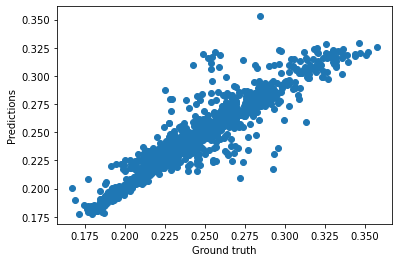

In [44]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [45]:
#%store model_fr_relative_swinging_x

In [46]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [47]:
# Save model
#joblib.dump(model_fr_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fr_relative_swinging_x.sav")

### Predict FL foot -> y

In [49]:
# Input
X = np.hstack((X_relative_footsteps_acc_FR_swinging[:, :3], # prev velocity command
               X_relative_footsteps_acc_FR_swinging[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_FR_swinging[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_FR_swinging[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_FR_swinging[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_FR_swinging[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_FR_swinging[:, 3]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fr_relative_swinging_y = LinearRegression()

# Fit the model
model_fr_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_fr_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.8126505792701687
RMSE:  0.010232591650680007
The lowest error is:  6.450922001299819e-07
The highest error is:  0.05404999268892552
The avg. error is:  0.006380747674160624


In [50]:
model_fr_relative_swinging_y.coef_

array([[-0.01809453, -0.01077375,  0.02036496, -0.00126937,  0.10274441,
         0.16171618, -0.16819275, -0.07311762,  0.33114248,  0.44643303,
        -0.10049211, -0.06434175,  0.48633065,  0.24031912]])

In [51]:
model_fr_relative_swinging_y.intercept_

array([0.02863098])

Text(0, 0.5, 'Predictions')

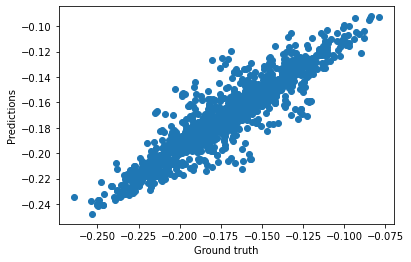

In [52]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [35]:
#%store model_fr_relative_swinging_y

In [36]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [37]:
# Save model
#joblib.dump(model_fr_relative_swinging_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fr_relative_swinging_y.sav")